<a href="https://colab.research.google.com/github/Sanketkamble01/Playstore-app-review-analysis/blob/main/Individual_Notebook_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Play Store is the biggest market for Android apps worldwide.On google play store there are more than 5 million applications with more than 3 billion active user across more than 190 countries.This project provides us with two CSV files.Our first task is individual work and extract information from the data

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read CSV files
ps_dataset1 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Play Store Data.csv')
ps_dataset2 = pd.read_csv('/content/drive/MyDrive/Capstone Project/User Reviews.csv')

In [ ]:
ps_dataset1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
ps_dataset2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
ps_dataset1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
ps_dataset2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
ps_dataset1.shape

(10841, 13)

In [ ]:
ps_dataset2.shape

(64295, 5)

In [ ]:
ps_dataset1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
ps_dataset2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

**Data cleaning:** This is the most importent part of project.Validate and cleanse the data is the essential for eliminating inaccurate data and completing gaps. Here are several key duties

*   deleting unnecessary data
*   completing blank values.


For a given application, a dataset might contain duplicate values we need to remove it.

In [ ]:
#Drop the all null values
ps_dataset1.dropna(how = 'any',inplace = True)

In [ ]:
ps_dataset2.dropna(how = 'any',inplace = True)

In [ ]:
ps_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [ ]:
ps_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
#Now check the duplicate values by counting unique apps - total apps
total = ps_dataset1.shape[0]
unique = len(ps_dataset1['App'].unique())
dublicate = total - unique
print("Total number of apps in play store data is: ",total)
print("Total number of unique apps in play store data is: ",unique)
print("Total number of dublicate apps play store data is: ", dublicate)

Total number of apps in play store data is:  9360
Total number of unique apps in play store data is:  8190
Total number of dublicate apps play store data is:  1170


In [ ]:
ps_dataset1.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [ ]:
ps_dataset2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In playstore dataset we have entries of size , installs and price with special characters like 'M','+','$' respectively.This prevents columns from being purely numerical,making their use in furture mathematics difficult.

> we need to remove this special characters(M,+,$)

In [ ]:
def format(value):
  if value[-1:] == "k":
     return float(value[0:-1])/1000
  elif value[-1:] == "M":
     return  value
  else:
     return np.nan 
ps_dataset1.rename(columns = {'Size':'Size(Mb)'}, inplace = True)  

ps_dataset1["Size(Mb)"]=ps_dataset1["Size(Mb)"].map(lambda x: format(x))
 
ps_dataset1["Size(Mb)"]=ps_dataset1["Size(Mb)"].apply(lambda x: str(x).replace('M',"") if 'M' in str(x) else x)

In [ ]:
# replace "$" 
ps_dataset1["Price"]=ps_dataset1["Price"].str.replace("$","")
# replace  "+" and "," it with an empty string
ps_dataset1["Installs"]=ps_dataset1["Installs"].str.replace("+","").str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


Above columns data type is 'object' because it has combination of numerical data and special charactries.  For further analysis we need to change data type to float

In [ ]:
# Change the data type to float
ps_dataset1["Reviews"]=pd.to_numeric(ps_dataset1["Reviews"])
ps_dataset1["Installs"]=ps_dataset1["Installs"].astype(float)
ps_dataset1["Price"]=ps_dataset1["Price"].astype(float)
ps_dataset1["Size(Mb)"]=ps_dataset1["Size(Mb)"].astype(float)

**1.The number of Apps in each category**

> 


We are finished with data cleaning part and now we starting with data visualisating

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


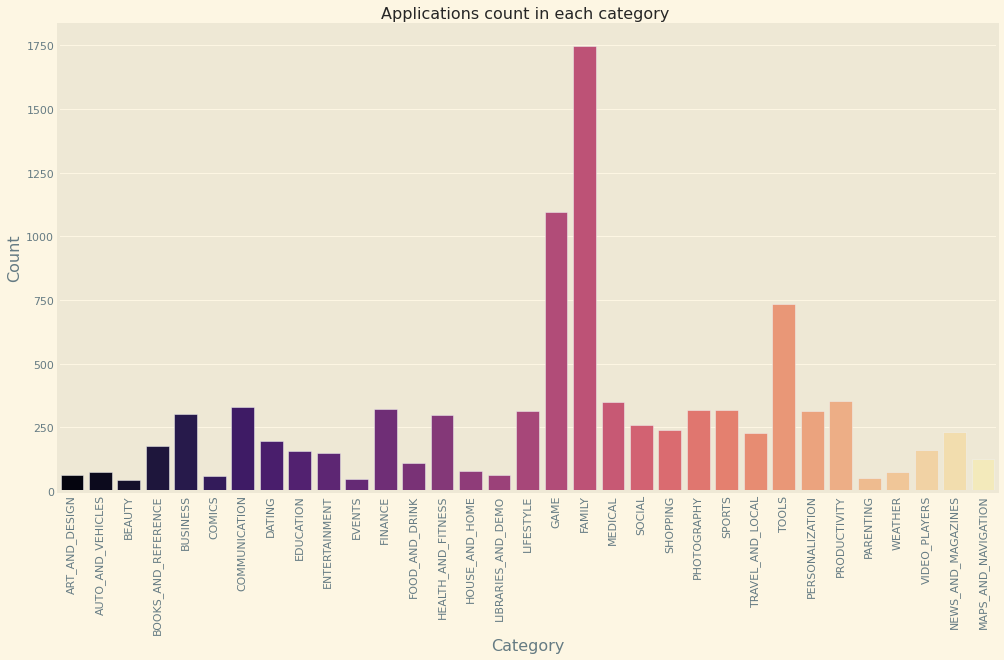

In [ ]:
plt.figure(figsize=(15,8))
plt.style.use("Solarize_Light2")
sns.countplot('Category',data=ps_dataset1,palette="magma")
plt.xlabel("Category", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Applications count in each category ")
plt.xticks(rotation=90)
plt.show();

**Conclusion:**

> 
From the above graph we can clearly see that FAMILY and GAME category is on the top followed by TOOLS,PRODUCTIVITY etc.



2.Now see Number of Installs in each category. We can compare installs column with Category column

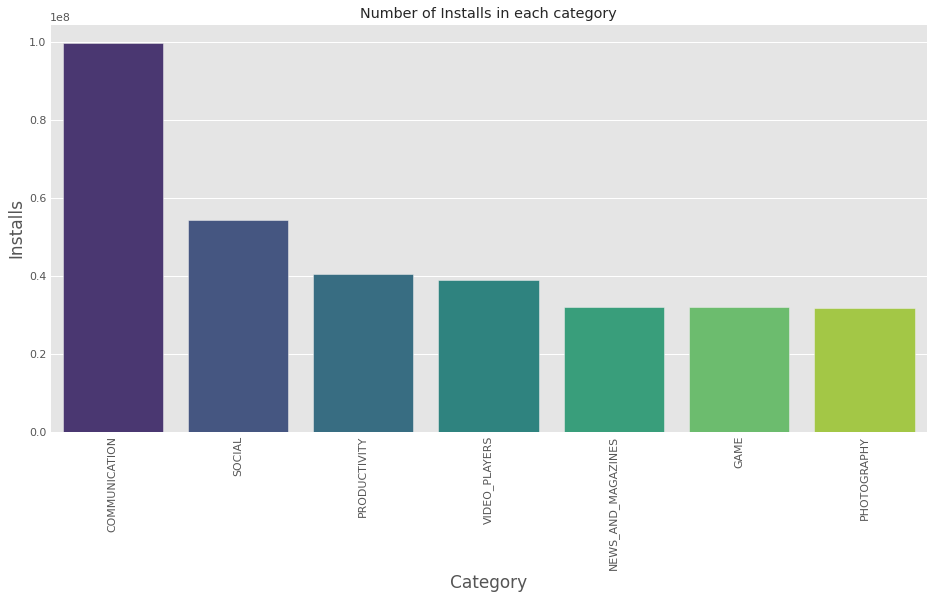

In [ ]:
a1=(ps_dataset1.groupby("Category").agg({"Installs":"mean"}).sort_values(by="Installs",ascending=False).reset_index().head(7))
b1=pd.DataFrame(a1)

plt.figure(figsize=(14,7))
plt.style.use("ggplot")
sns.barplot(y="Installs",x="Category",data=b1,palette="viridis")
plt.xlabel("Category", fontsize=17)
plt.ylabel("Installs", fontsize=17)
plt.title("Number of Installs in each category")
plt.xticks(rotation=90)
plt.show();

**Conclusion:**

> Here we can see COMMUNICATION is on top then SOCIAL is on second in FAMILY category is not in the list of number of Installs in each category





3.Now see character "ratings" where we use swarmplot plot and density plot and analyze it.

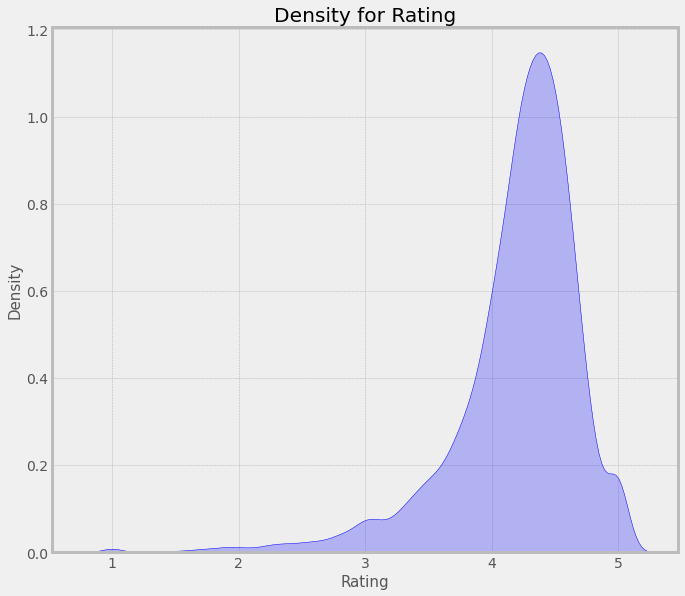

In [ ]:
plt.figure(figsize=(10,9))
plt.style.use("bmh")
sns.kdeplot(ps_dataset1["Rating"],color="blue",shade = True)
plt.xlabel("Rating", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.title("Density for Rating")
plt.show();

**Conclusion**

>The average rating for Apps in play store is around 4.3,4.4 .Which is quite high. Left skewed histogram is showing us most of the apps is highly rated and less number of apps is low rated 



4.Now let's compare between two intresting category free v/s paid apps. 

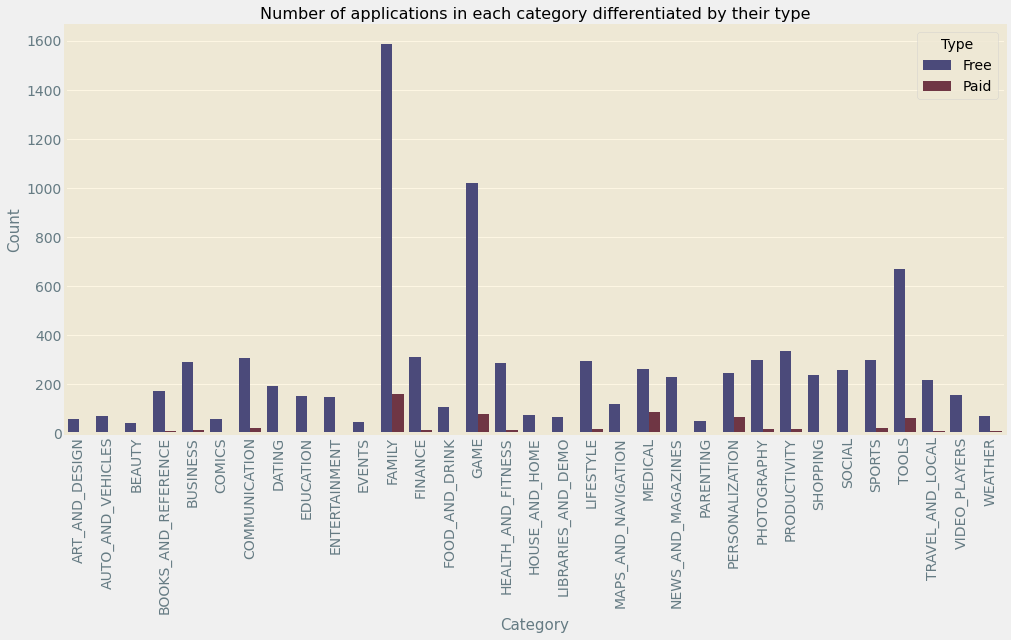

In [ ]:
ds1=ps_dataset1.groupby(["Category","Type"])["App"].count().reset_index()
ds2=pd.DataFrame(ds1)
#plot the graph
plt.figure(figsize=(15,7))
plt.style.use("Solarize_Light2")
sns.barplot(x="Category",y="App",hue="Type",data=ds2,palette="icefire")
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Number of applications in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

**Conclusion**

> From above graph we can conclude that mejority categories have most free Apps than paid Apps.In play store dataset most of the Apps in Family,Games & tools are free to install.
> In parallel,the family,personalization and medicine categories accounted for largest number of paid apps to download


5.It's time to see impact of ratings on Number of installations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


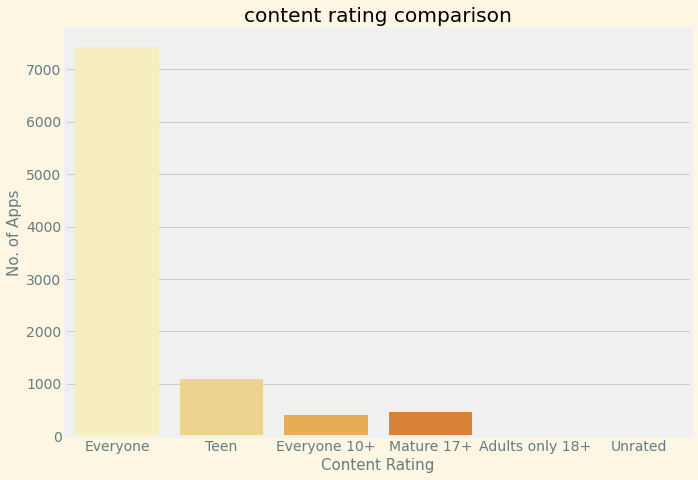

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
sns.countplot("Content Rating",data=ps_dataset1,palette="YlOrBr")
plt.xlabel("Content Rating",fontsize=15)
plt.ylabel("No. of Apps",fontsize=15)
plt.title("content rating comparison",color = "black")
plt.show();

From the above graph in count catagery everyone catagery is highest

Text(0.5, 0, 'Content Rating')

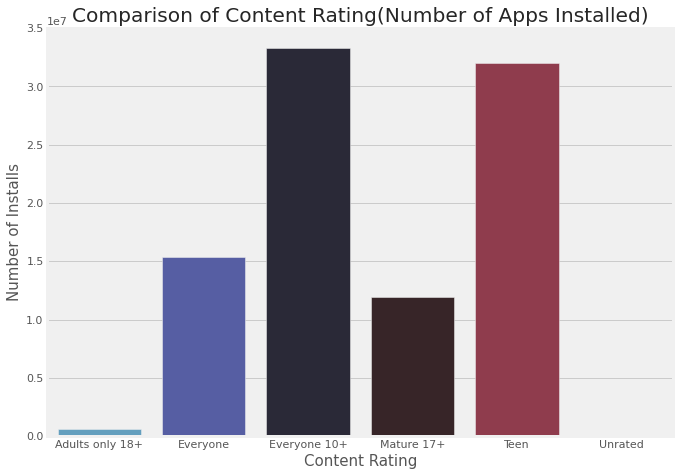

In [ ]:
g1=ps_dataset1.groupby("Content Rating").agg({"Installs":"mean"}).reset_index()
point_4=pd.DataFrame(g1)
point_4
#plot the graph
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
sns.barplot(y="Installs",x="Content Rating",data=point_4,palette="icefire")
plt.title("Comparison of Content Rating(Number of Apps Installed)")
plt.ylabel("Number of Installs",fontsize=15)
plt.xlabel("Content Rating",fontsize=15)

**Conclusion:**

> we got completly different result than previous graph. Number of apps for everyone is greater numbers than teens but in instllation no. of teen apps is greater than everyone



6.Analyze the size of Apps

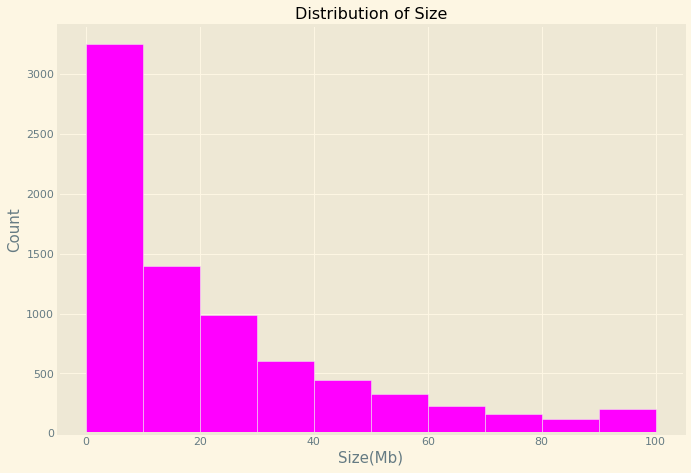

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("Solarize_Light2")
plt.hist(ps_dataset1['Size(Mb)'],color="magenta")
plt.xlabel("Size(Mb)",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Distribution of Size",color = "black")
plt.show();

**Conclusion:**

> Above graph says that most of the apps is smaller in size



7.now compare size with installation and see Size impate on no. of installsation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


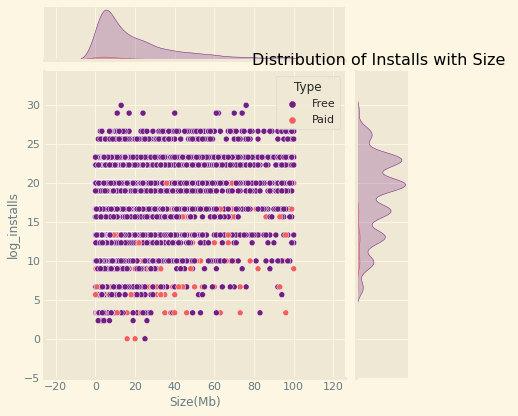

In [ ]:
ps_dataset1['log_installs'] = np.log2(ps_dataset1['Installs'])
plt.style.use("Solarize_Light2")
sns.jointplot(ps_dataset1['Size(Mb)'],ps_dataset1['log_installs'],hue=ps_dataset1["Type"],palette="magma")
plt.title("Distribution of Installs with Size ",color = "black")
plt.show();

Conclusion:

> Above plot clearly indicates that size of apps are directly impact on number of instllations. Apps in bigger size are less installed.



8.let's we mostly use words in Translated review 

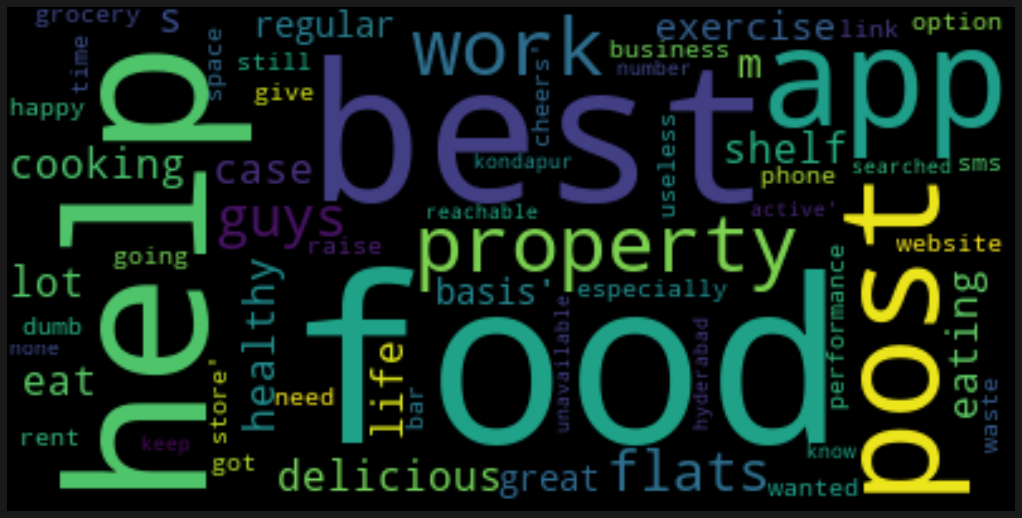

In [ ]:
stopword = ps_dataset2[ps_dataset2['Translated_Review'].notnull()]
from wordcloud import WordCloud, STOPWORDS
text = stopword.Translated_Review.values
wordcloud = WordCloud(stopwords = STOPWORDS).generate(str(text).lower())
fig = plt.figure(figsize = (14,7),facecolor = 'k',edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Conclusion**

> Here are few mostly used words: Food,best,app,help,work 



9.sentiment_subjective and sentiment polarity propertional

In [ ]:
merged = ps_dataset1.merge(ps_dataset2, on="App")

In [ ]:
sentimet_subjectivity_polarity = merged.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
merged['Sentiment_Subjectivity'] = merged['Sentiment_Subjectivity'].abs()

In [ ]:
merged['Sentiment_Polarity'] = merged['Sentiment_Polarity'].abs()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


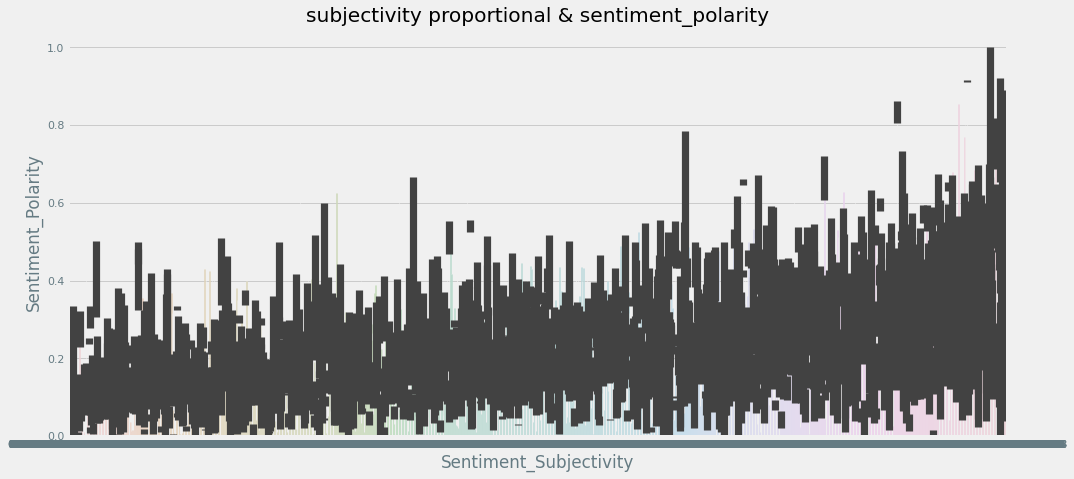

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(merged['Sentiment_Subjectivity'], merged['Sentiment_Polarity'])
plt.title("subjectivity proportional & sentiment_polarity",color = "black")
plt.show()

**Conclusion:**

> Above scatter plot says that mostly propertional behavior is very high and low but sentiment Subjectivity is not always proportional to sentiment polarity



10.percentage of sentiment

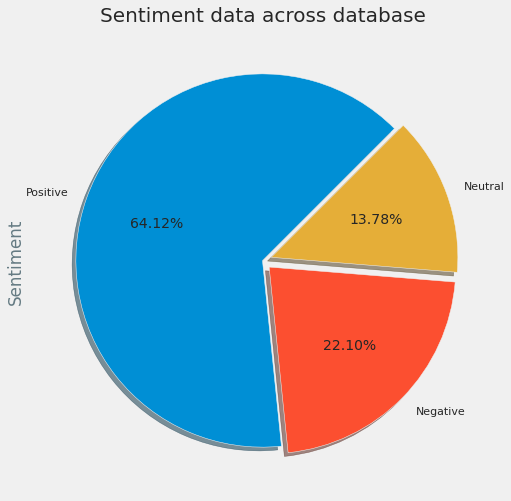

In [ ]:
plt.figure(figsize=(8,8))
pd.value_counts(ps_dataset2["Sentiment"]).plot(kind = 'pie',  autopct='%1.2f%%',shadow=True, explode=[0, 0.05, 0.05], startangle=45 )
plt.title("Sentiment data across database",size=20)
plt.show()

**Conclusion:**

> conclusion of above pie chart is positive reviews for all apps is higher than negative and neutral.



**11.find correlation**

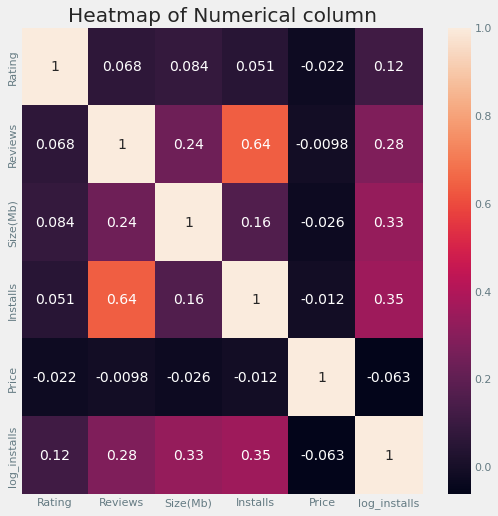

In [ ]:
plt.style.use("fivethirtyeight")
plt.title("Heatmap of Numerical column")
sns.heatmap(ps_dataset1.corr(),annot=True,robust=True)
plt.show();

**Conclusion:**

> There is a strong correlation between installs and reviews that is 0.64

